In [1]:
from IPython.display import display
import spot
spot.setup()

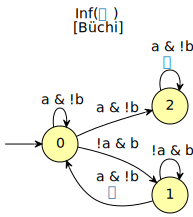

In [2]:
a=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 0
[ 0&!1] 2
[!0& 1] 1
State: 1
[ 0&!1] 0 {0}
[!0& 1] 1
State: 2
[ 0&!1] 2 {0}
--END--
""")
a.save("example_for_slim.hoa")

In [3]:
!\
`# Command to construct BA automaton` \
`# Right now it just does BP algorithm..` \
cat example_for_slim.hoa|/home/psimovec/automaty/seminator/seminator --slim --pure --scc-aware=0 > slim.hoa && \
cat "slim.hoa"

HOA: v1
States: 4
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc deterministic
--BODY--
State: 0 "{0} , ∅ , 0"
[!0&1] 1
[0&!1] 2
State: 1 "{1} , ∅ , 0"
[!0&1] 1
[0&!1] 0 {0}
State: 2 "{0,2} , ∅ , 0"
[!0&1] 1
[0&!1] 3
State: 3 "{0,2} , {2} , 0"
[!0&1] 1
[0&!1] 3
--END--

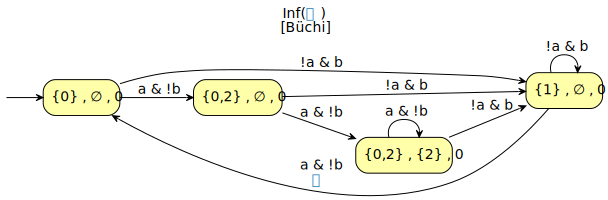

In [4]:
# Display "slim" automaton [not a slim automaton yet]
semvysledek=spot.automaton("slim.hoa")
display(semvysledek)

In [5]:
!`# semi-determinic automaton from example just for comparison` \
seminator --tba --pure --scc-aware=0 -s0 example_for_slim.hoa > semi_deterministic.hoa

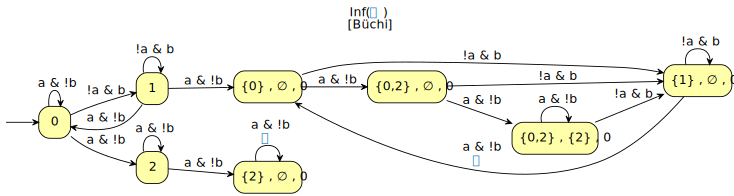

In [6]:
vysledek=spot.automaton("semi_deterministic.hoa")
display(vysledek)